**Hyperparameter Turning**

1.Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

2.Dataset

In [4]:
data = {
    "Study_Hours": [1,2,3,4,5,6,7,8,9,10],
    "Attendance": [50,55,60,65,70,75,80,85,90,95],
    "Previous_Score": [35,40,45,50,55,60,65,70,75,80],
    "Pass": [0,0,0,0,0,1,1,1,1,1]
}

df = pd.DataFrame(data)

x = df.drop("Pass", axis=1)
y = df["Pass"]


3.Train_Test_Split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

4.Define Model

In [6]:
rf_model = RandomForestClassifier(random_state=42)

5.Define Hyperparameter Grid

In [7]:
param_grid = {"n_estimators" : [50,100,150],
              "max_depth" : [2,3,4,None],
              "max_features" : ["sqrt","log2"]}

6.Apply GridSearchCV

In [14]:
grid = GridSearchCV(estimator=rf_model,
                    param_grid=param_grid,
                    cv=3,
                    scoring="accuracy",
                    n_jobs=-1)
grid.fit(x_train,y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [2, 3, ...], 'max_features': ['sqrt', 'log2'], 'n_estimators': [50, 100, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;-

7.Best Parameters & Evaluation

In [22]:
print("Best Parameters:",grid.best_params_)
print("Best CV Score:",grid.best_score_)
best_grid = grid.best_estimator_
y_pred = best_grid.predict(x_test)
grid_accuracy = accuracy_score(y_test,y_pred)
print("Test Accuracy:",grid_accuracy)

Best Parameters: {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 50}
Best CV Score: 0.8888888888888888
Test Accuracy: 1.0


**RandomizedSearchCV Example**

In [24]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(rf_model,
                                 param_distributions=param_grid,
                                 n_iter=5,cv=3,
                                 scoring="accuracy",
                                 random_state=42,
                                 n_jobs=-1)
random_search.fit(x_train,y_train)

best_rand = random_search.best_estimator_
rand_pred = best_rand.predict(x_test)
rand_accuracy = accuracy_score(y_test,rand_pred)
print("Best Params:",random_search.best_params_)
print("Best Random Search CV Score:",random_search.best_score_)
print("Test Accuracy of Random Search CV:",rand_accuracy)

Best Params: {'n_estimators': 150, 'max_features': 'sqrt', 'max_depth': 3}
Best Random Search CV Score: 0.8888888888888888
Test Accuracy of Random Search CV: 1.0


**Visualization**

Grid Search CV Heatmap Visualization

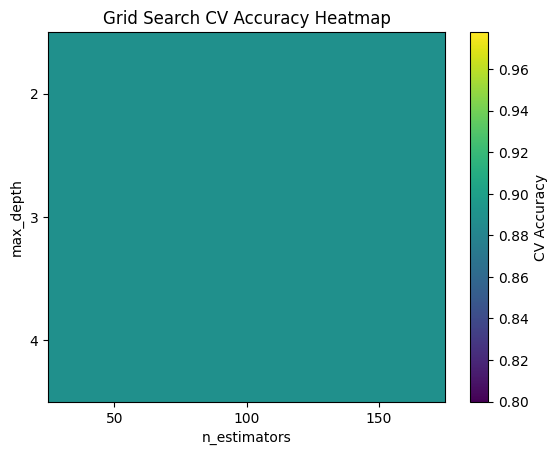

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert CV results to DataFrame
results = pd.DataFrame(grid.cv_results_)

# Pivot table for heatmap (max_depth vs n_estimators)
pivot = results.pivot_table(
    values="mean_test_score",
    index="param_max_depth",
    columns="param_n_estimators"
)

# Plot heatmap using matplotlib (no seaborn)
plt.imshow(pivot, aspect="auto")
plt.colorbar(label="CV Accuracy")

plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)

plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.title("Grid Search CV Accuracy Heatmap")

plt.show()


Random Search CV  Score Distribution

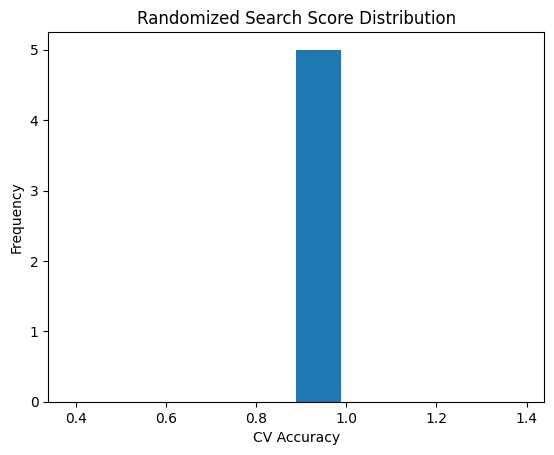

In [26]:
rand_results = pd.DataFrame(random_search.cv_results_)

scores = rand_results["mean_test_score"]

plt.hist(scores)
plt.xlabel("CV Accuracy")
plt.ylabel("Frequency")
plt.title("Randomized Search Score Distribution")
plt.show()


Best Model Comparison: Grid vs Random vs Default)

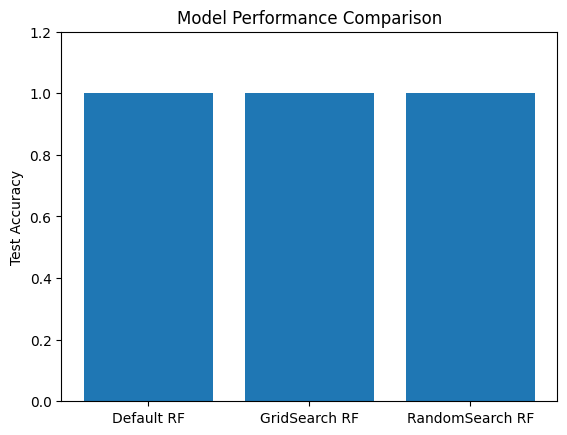

Default Accuracy: 1.0
GridSearch Accuracy: 1.0
RandomSearch Accuracy: 1.0


In [29]:
from sklearn.metrics import accuracy_score

# Default RF
default_rf = RandomForestClassifier(random_state=42)
default_rf.fit(x_train, y_train)
default_acc = accuracy_score(y_test, default_rf.predict(x_test))

# Grid best
grid_acc = accuracy_score(y_test, best_model.predict(x_test))

# Random best
rand_best = random_search.best_estimator_
rand_acc = accuracy_score(y_test, rand_best.predict(x_test))

# Bar chart
plt.bar(
    ["Default RF", "GridSearch RF", "RandomSearch RF"],
    [default_acc, grid_acc, rand_acc]
)

plt.ylabel("Test Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0, 1.2)
plt.show()

print("Default Accuracy:", default_acc)
print("GridSearch Accuracy:", grid_acc)
print("RandomSearch Accuracy:", rand_acc)
